In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [21]:
df = pd.read_csv("orange.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [4]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df["Color"].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [7]:
df["Variety"].value_counts()

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

In [8]:
df["Blemishes (Y/N)"].value_counts()

Blemishes (Y/N)
N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: count, dtype: int64

In [22]:
string_values_df = df.select_dtypes(include="object")
string_values_df

,Color,Variety,Blemishes (Y/N)
0,Orange,Valencia,N
1,Deep Orange,Navel,N
2,Light Orange,Cara Cara,N
3,Orange-Red,Blood Orange,N
4,Orange,Hamlin,Y (Minor)
...,...,...,...
236,Orange-Red,Tangerine,Y (Scars)
237,Light Orange,Minneola (Hybrid),N
238,Deep Orange,Temple,Y (Minor Insect Damage)
239,Light Orange,Moro (Blood),Y (Minor Insect Damage)


In [27]:
features_to_encode = list(string_values_df.columns)

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/1213961932.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/12139

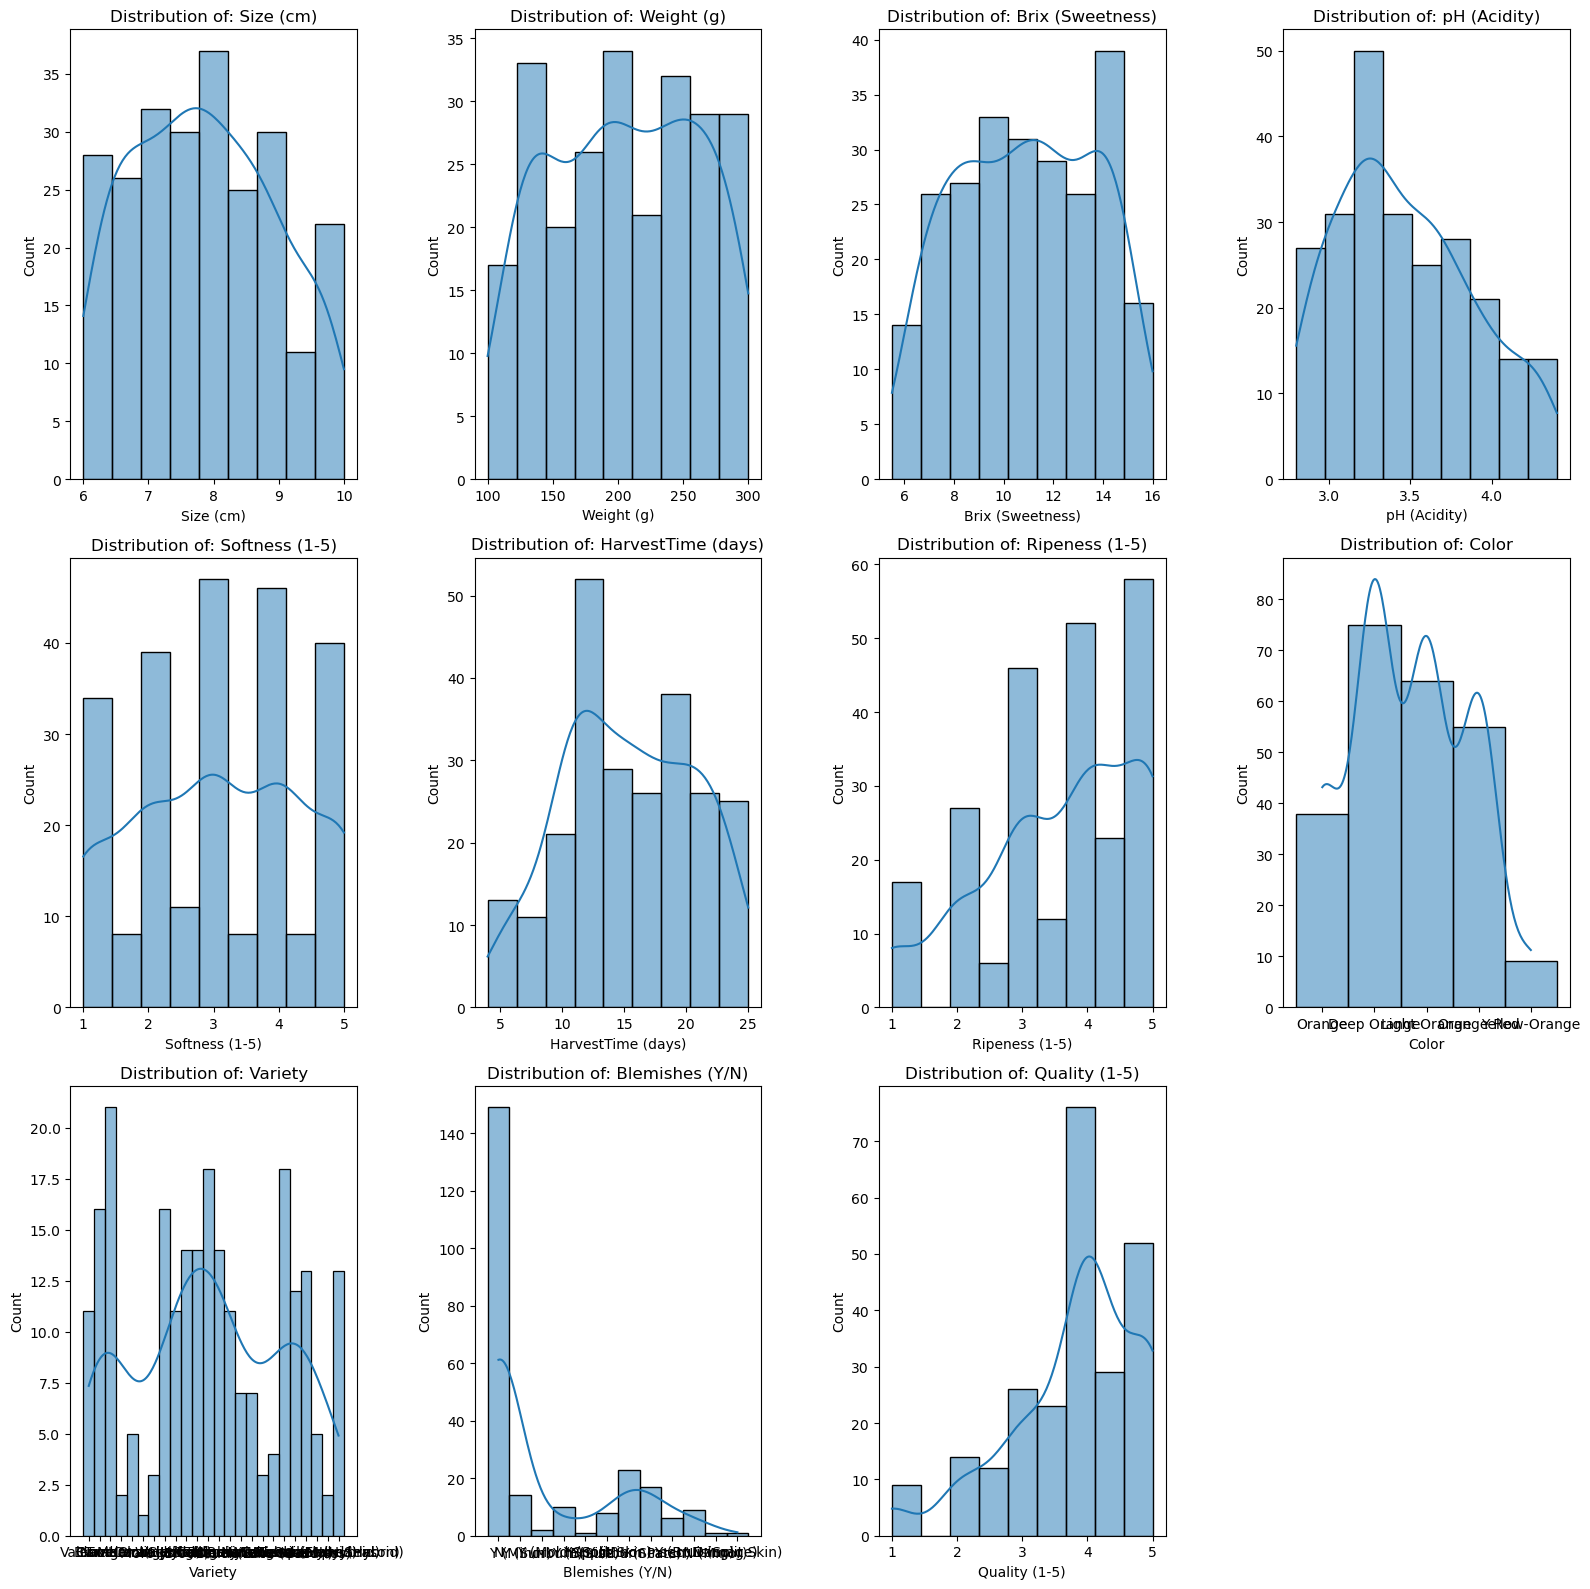

In [15]:
plt.figure(figsize=(16,16))
num_plots = len(df.columns)
rows = (num_plots +3)//4

for i, col in enumerate(df.columns):
  plt.subplot(rows, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of: {col}")
  plt.tight_layout()
  plt.plot()

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_53898/3279910188.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


ValueError: could not convert string to float: 'Orange'

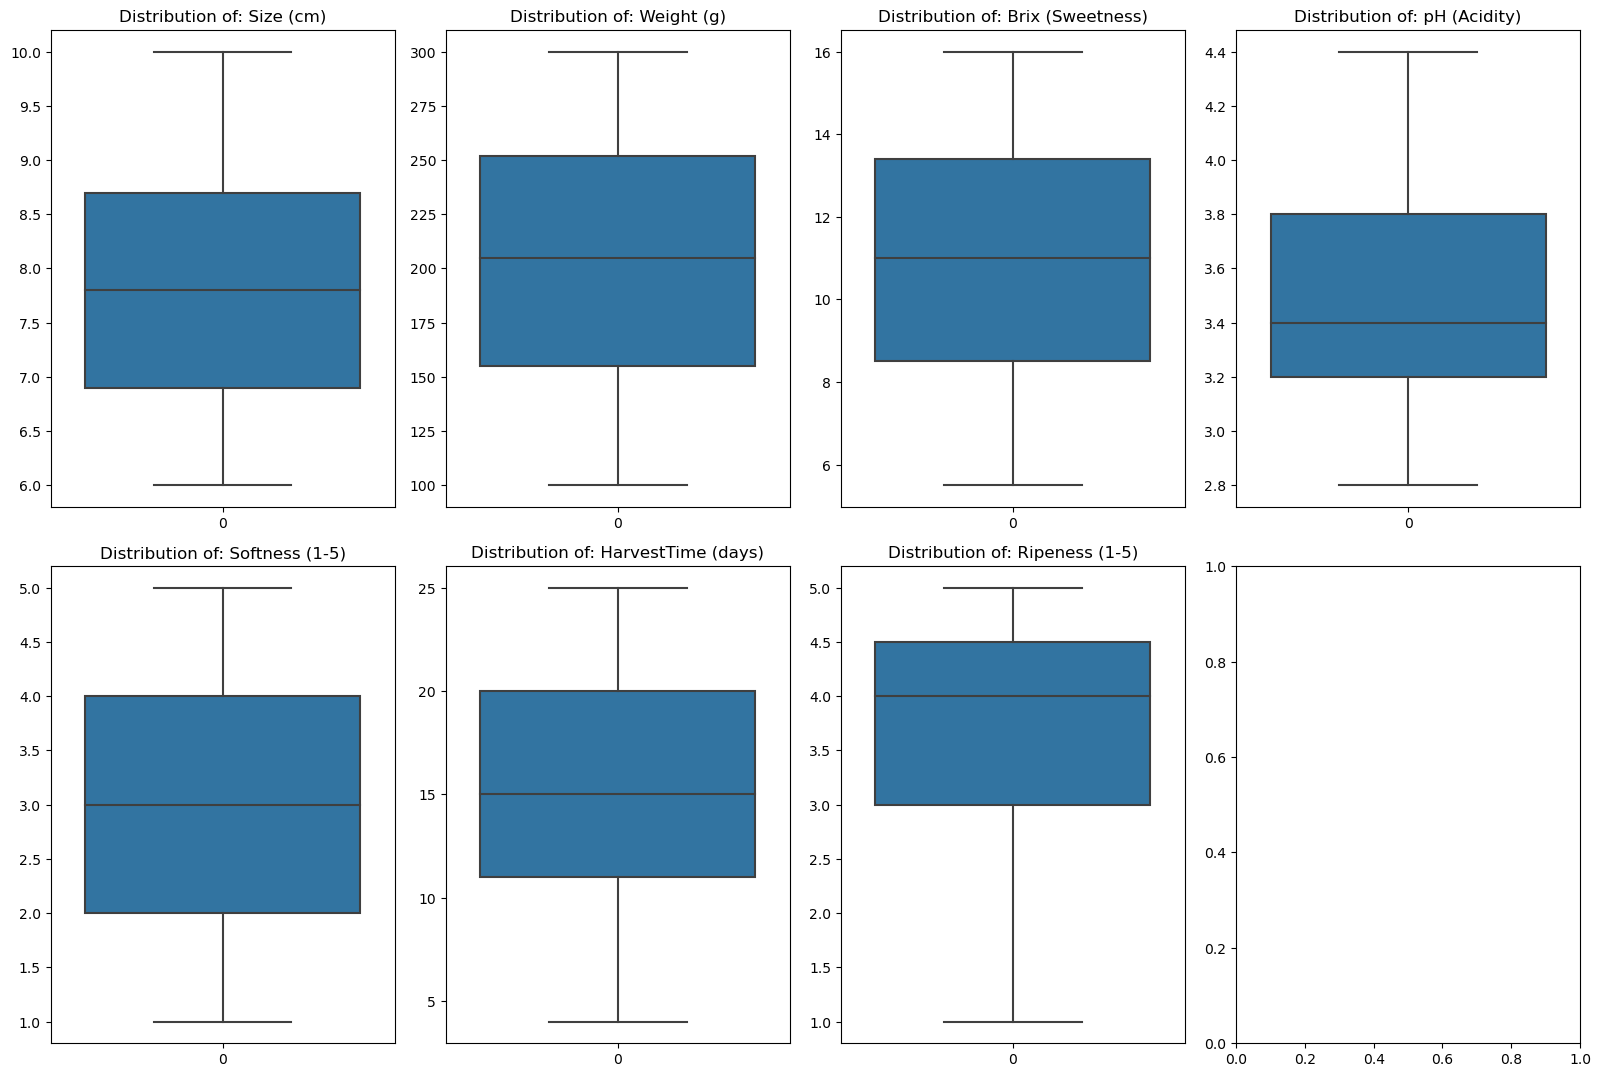

In [17]:
plt.figure(figsize=(16,16))
num_plots = len(df.columns)
rows = (num_plots +3)//4

for i, col in enumerate(df.columns):
  plt.subplot(rows, 4, i+1)
  sns.boxplot(df[col])
  plt.title(f"Distribution of: {col}")
  plt.tight_layout()
  plt.plot()

In [37]:
df.columns


Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)',
       'Quality (1-5)', 'Color_Deep Orange', 'Color_Light Orange',
       'Color_Orange', 'Color_Orange-Red', 'Color_Yellow-Orange',
       'Variety_Ambiance', 'Variety_Blood Orange',
       'Variety_California Valencia', 'Variety_Cara Cara',
       'Variety_Clementine', 'Variety_Clementine (Seedless)', 'Variety_Hamlin',
       'Variety_Honey Tangerine', 'Variety_Jaffa', 'Variety_Midsweet (Hybrid)',
       'Variety_Minneola (Hybrid)', 'Variety_Moro (Blood)',
       'Variety_Murcott (Hybrid)', 'Variety_Navel',
       'Variety_Navel (Early Season)', 'Variety_Navel (Late Season)',
       'Variety_Ortanique (Hybrid)', 'Variety_Satsuma Mandarin',
       'Variety_Star Ruby', 'Variety_Tangelo (Hybrid)', 'Variety_Tangerine',
       'Variety_Temple', 'Variety_Valencia', 'Variety_Washington Navel',
       'Blemishes (Y/N)_N', 'Blemishes (Y/N)_N (Minor)',
       '

In [31]:
encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(df[features_to_encode])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

df.reset_index(drop=True, inplace=True)

df = pd.concat([df, encoded_df], axis=1)

df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
from sklearn.linear_model import LinearRegression


X,y = df.drop("Quality (1-5)", axis=1), df["Quality (1-5)"]

LR = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR.fit(X_train, y_train)

predictions = LR.predict(X_test)

LR.score(X_test,y_test)

0.5508153905802677

In [40]:
df["Quality (1-5)"] = df["Quality (1-5)"].apply(lambda x: 0 if x < 3 else 1)

In [41]:
X,y = df.drop("Quality (1-5)", axis=1), df["Quality (1-5)"]

In [43]:
X,y = df.drop("Quality (1-5)", axis=1), df["Quality (1-5)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models

2024-03-23 18:45:32.569460: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 866us/step


,Model,Accuracy
0,LogisticRegression,0.897959
1,SVC,0.897959
2,DecisionTreeClassifier,0.857143
3,RandomForestClassifier,0.857143
4,KNeighborsClassifier,0.877551
5,GradientBoostingClassifier,0.877551
6,GaussianNB,0.448980
7,Sequential,0.918367


 Accuracy is 0.8979591836734694
Model is LogisticRegression() Classification Report
:               precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.95      0.93      0.94        44

    accuracy                           0.90        49
   macro avg       0.73      0.77      0.74        49
weighted avg       0.91      0.90      0.90        49



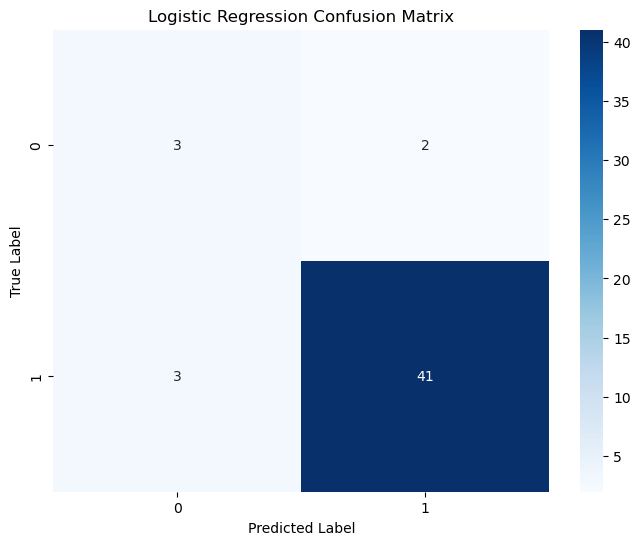

In [45]:
LR = LogisticRegression()

LR.fit(X_train_scaled, y_train)
predictions = LR.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Accuracy is {accuracy}")
print(f"Model is {LR} Classification Report\n: {classification_report(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(data=cm, fmt="g", cmap="Blues", annot=True)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 Accuracy is 0.4489795918367347
Model is GaussianNB() Classification Report
:               precision    recall  f1-score   support

           0       0.16      1.00      0.27         5
           1       1.00      0.39      0.56        44

    accuracy                           0.45        49
   macro avg       0.58      0.69      0.41        49
weighted avg       0.91      0.45      0.53        49



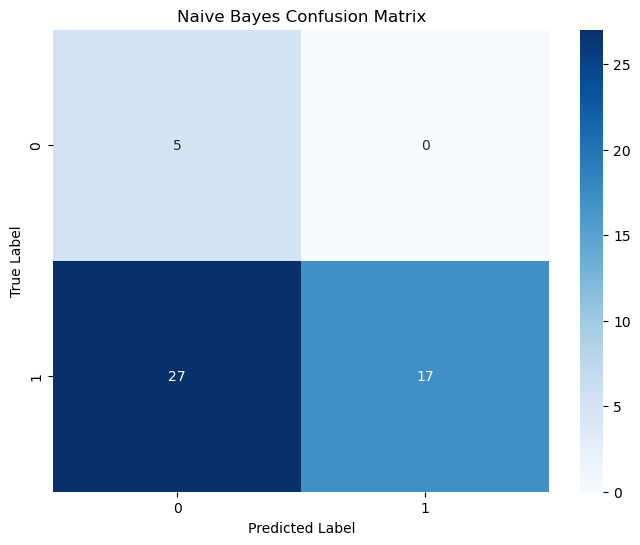

In [46]:
GNB= GaussianNB()

GNB.fit(X_train_scaled, y_train)
predictions = GNB.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Accuracy is {accuracy}")
print(f"Model is {GNB} Classification Report\n: {classification_report(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(data=cm, fmt="g", cmap="Blues", annot=True)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 Accuracy is 0.8979591836734694
Model is SVC() Classification Report
:               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.93      0.95      0.94        44

    accuracy                           0.90        49
   macro avg       0.72      0.68      0.69        49
weighted avg       0.89      0.90      0.89        49



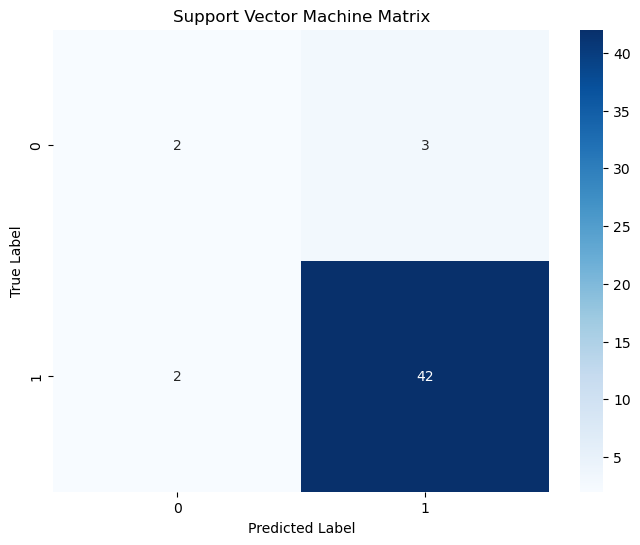

In [47]:
SVC= SVC()

SVC.fit(X_train_scaled, y_train)
predictions = SVC.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Accuracy is {accuracy}")
print(f"Model is {SVC} Classification Report\n: {classification_report(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(data=cm, fmt="g", cmap="Blues", annot=True)
plt.title("Support Vector Machine Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 Accuracy is 0.9387755102040817
Model is RandomForestClassifier() Classification Report
:               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.98      0.95      0.97        44

    accuracy                           0.94        49
   macro avg       0.82      0.88      0.85        49
weighted avg       0.95      0.94      0.94        49



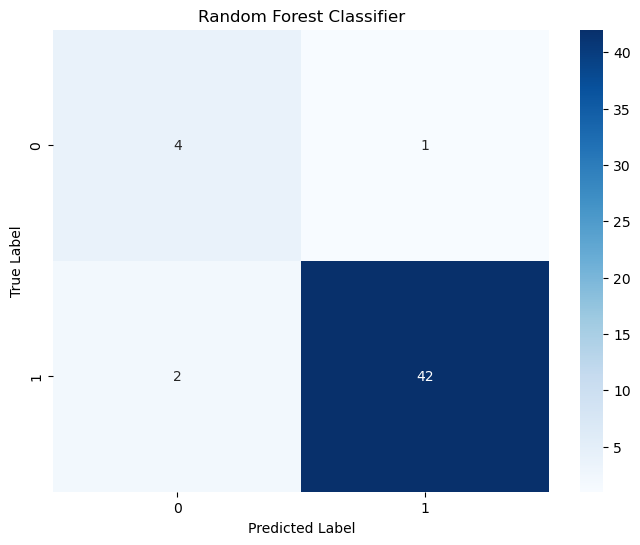

In [48]:
SVC= RandomForestClassifier()

SVC.fit(X_train_scaled, y_train)
predictions = SVC.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Accuracy is {accuracy}")
print(f"Model is {SVC} Classification Report\n: {classification_report(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(data=cm, fmt="g", cmap="Blues", annot=True)
plt.title("Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()